# Mobile Activity & Usage Prediction Dataset 

Topic:
Study and manipulation of data from different sources for class classification using 
artificial intelligence (AI) algorithms.\
The data acquisition can be done using datasets available on the web or else acquired
through systems with sensors.\
The dataset must have at least **5 features** (columns with different characteristics).

## Project Requirements 

<input type="checkbox" checked/> Analysis of Dataset Features. \
<input type="checkbox" checked/>  Preparation of the data to put into an AI model.\
<input type="checkbox" checked/> Study of the most suitable Ai model for the chosen dataset.\
<input type="checkbox" checked/> Application of the selected Ai model to the dataset with and without the application of PCA/LDA techniques.\
<input type="checkbox" checked/> Analysis of the Ai model training (Confusion matrix, learning curves, etc...).\
<input type="checkbox" checked/> Study of the most important features of the dataset (feature importance) to improve the accuracy of the Ai model.\
<input type="checkbox" checked/> Feature Importance self Obtained. (By own algorythms)

## Valorization of the Process

<input type="checkbox" checked/> Hardware for acquiring the dataset.\
<input type="checkbox" checked/> Application of data combination techniques (example: data alignment,
downsampling/upsampling, etc...).\
<input type="checkbox" checked/> Application of data quality improvement techniques (example: filters).\
<input type="checkbox" checked/> Other approaches...

## Brief Description of the Work

The following code analyses two datasets collected from 6 different cell phones using the as a collection method Home Assistant resources to gather data from 51 different features with the objective of test and develop skills in the field of data fusion according with the project defined by the professor V. Oliveira (voliveira@ipca.pt)

The authors of the following project and respective data are: 

@fandrepm18\
@JoaquinDillen\
@nunof98




# Load Dataset

In [ ]:
import pandas as pd

filename = 'reclassifying_features/dataset_v1.csv'
#filename = 'New_Dataset_v1.csv'

# load dataset and set time column as index
df = pd.read_csv(f'datasets/{filename}').set_index('time')
df

In [ ]:
df.info()

# Analysis of dataset features
Analyses the statistical information about each variable.

In [ ]:
import missingno as msno

# check for missing values
msno.matrix(df)
df.isnull().sum()

In [ ]:
# Quick view of data statistical behavior.
df.describe()

In [ ]:
import seaborn as sns

sns.countplot(df['last_used_app'])

The samples don't have the same size. So it's advised to use stratify when splitting the data.

In [ ]:
print('% of classes')
round((df['last_used_app'].value_counts() / df.shape[0]) * 100, 2)

In [ ]:
sns.countplot(df['device_id'])

In [ ]:
print('% of phones')
round((df['device_id'].value_counts() / df.shape[0]) * 100, 2)

In [ ]:
from matplotlib import pyplot as plt

plt.title('Total TX distribution')
df['total_tx_gb'].plot(kind='kde')

In [ ]:
plt.title('Total RX distribution')
df['total_rx_gb'].plot(kind='kde')

In [ ]:
sns.catplot(data=df, x='last_used_app', y='total_tx_gb')

In [ ]:
sns.catplot(data=df, x='last_used_app', y='total_tx_gb', hue='device_id')

In [ ]:
df['last_update_trigger'].value_counts().plot(kind='barh', title='Update Trigger')

## Encode categorical features

Encoders are used to transform categorical data into a numerical format, which allows the data to be more easily analyzed and used for machine learning tasks. By encoding categorical data, the data can be represented in a way that can be more easily processed by algorithms, which can lead to more accurate predictions and insights.

In [ ]:
import category_encoders as ce

# select categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
# cat_cols.remove('last_used_app')

encoder = ce.OrdinalEncoder(cols=cat_cols)
df = encoder.fit_transform(df)
df

In [ ]:
df.describe()

# Correlation Matrix

A correlation matrix is a useful tool in analyzing the relationship between different features in a dataset. It provides a numerical measure of the strength and direction of the linear relationship between pairs of variables. By examining the correlation matrix, it is possible to identify which pairs of features are strongly related and which are weakly related. This can help to identify potential redundancies or collinearities between features, as well as highlight which features are most strongly associated with the target variable. Furthermore, the correlation matrix can help to identify potential issues such as multicollinearity, which can affect the stability and accuracy of regression models. Overall, the correlation matrix is a valuable tool in exploratory data analysis and can provide insights that are not immediately apparent from examining individual features in isolation.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation between variables')

# Get features and labels

Separate the features and the respective labels

In [ ]:
# get labels
y = df['last_used_app']
y

In [ ]:
# drop irrelevant columns (std < 1)
df = df.drop(df.std()[df.std() < 1.0].index.values, axis=1)
df

In [ ]:
# get features
X = df.drop(['last_used_app'], axis=1)
X

# Split dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Classification models

Classifiers used:
- Decision Tree
- KNeighbors
- MLP

# 1. Non-normalized values

In [ ]:
scores = {}

## 1.1 Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# build decision tree classifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree.fit(X_train, y_train)

# make prediction
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))
print(f'Train accuracy:\t {tree.score(X_train, y_train)}')
print(f'Test accuracy:\t {tree.score(X_test, y_test)}')
scores['Decision Tree'] =  tree.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Blues')

## 1.2 KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
knn = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn.fit(X_train, y_train)

# make prediction
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(f'Train accuracy:\t {knn.score(X_train, y_train)}')
print(f'Test accuracy:\t {knn.score(X_test, y_test)}')
scores['KNN'] =  knn.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')

## 1.3 MLP

In [ ]:
from sklearn.neural_network import MLPClassifier


# build MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp.fit(X_train, y_train)
plt.plot(mlp.loss_curve_)

In [ ]:
# make prediction
y_pred_mlp = mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
print(f'Train accuracy:\t {mlp.score(X_train, y_train)}')
print(f'Test accuracy:\t {mlp.score(X_test, y_test)}')
scores['MLP'] =  mlp.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, cmap='Blues')

# Classification ensembles and feature selectors

Classifiers used:
- Random Forest
- Voting
- Recursive Feature Elimination

## 1.4 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
rfc = RandomForestClassifier()
# train random forest
rfc.fit(X_train, y_train)

# make prediction
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(f'Train accuracy:\t {rfc.score(X_train, y_train)}')
print(f'Test accuracy:\t {rfc.score(X_test, y_test)}')
scores['Random Forest'] = rfc.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc, cmap='Blues')

## 1.5 Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

# build voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('tree', tree),
        ('knn', knn),
        ('mlp', mlp),
        ('rfc', rfc)
    ],
    voting='soft'
)
voting_classifier = voting_classifier.fit(X_train, y_train)


# make prediction
y_pred_voting_classifier = voting_classifier.predict(X_test)
print(classification_report(y_test, y_pred_voting_classifier))
print(f'Train accuracy:\t {voting_classifier.score(X_train, y_train)}')
print(f'Test accuracy:\t {voting_classifier.score(X_test, y_test)}')
scores['Voting Classifier'] = voting_classifier.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_voting_classifier, cmap='Blues')

# 1.6 Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

# build and fit classifier
rfe = RFE(RandomForestClassifier(), step=1).fit(X_train, y_train)

# make prediction
y_pred_rfe = rfe.predict(X_test)
print(classification_report(y_test, y_pred_rfe))
print(f'Train accuracy:\t {rfe.score(X_train, y_train)}')
print(f'Test accuracy:\t {rfe.score(X_test, y_test)}')
scores['RFE'] = rfe.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfe, cmap='Blues')

# PCA or LDA Usage

Our Dataset is presented with several datapoints so we can consider the fact that our dataset is a multi-sensor data fusion application, the need to keep the computational load low is very important, a low-dimensional common representational format may be the answer, to apply a dimension-reducing, or subspace technique to the raw input data. 

## 1.5 PCA

In [ ]:
scores_pca = {}

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca.shape, y.shape

PCA variance_ratio
The percentage of the explained variance is: explained_variance_ratio_

The variance i.e. the eigenvalues of the covariance matrix is: explained_variance_

Formula: explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
# split X and y into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

### 1.5.1 Decision tree

In [ ]:
# build decision tree classifier
tree_pca = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_tree_pca = tree_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_tree_pca))
print(f'Train accuracy:\t {tree_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {tree_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Decision Tree PCA'] =  tree_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_tree_pca, cmap='Blues')

### 1.5.2 KNeighbors

In [ ]:
# build KNeighbors classifier
knn_pca = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_knn_pca = knn_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_knn_pca))
print(f'Train accuracy:\t {knn_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {knn_pca.score(X_test_pca, y_test_pca)}')
scores_pca['KNN PCA'] =  knn_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_knn_pca, cmap='Blues')

### 1.5.3 MLP

In [ ]:
# build MLP classifier
mlp_pca = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_pca.fit(X_train_pca, y_train_pca)
plt.plot(mlp_pca.loss_curve_)

In [ ]:
# make prediction
y_pred_mlp_pca = mlp_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_mlp_pca))
print(f'Train accuracy:\t {mlp_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {mlp_pca.score(X_test_pca, y_test_pca)}')
scores_pca['MLP PCA'] =  mlp_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_mlp_pca, cmap='Blues')

### 1.5.4 Random Forest

In [ ]:
# build random forest classifier
rfc_pca = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca.fit(X_train_pca, y_train_pca)

# make prediction
y_pred_rfc_pca = rfc_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_rfc_pca))
print(f'Train accuracy:\t {rfc_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {rfc_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Random Forest PCA'] = rfc_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_rfc_pca, cmap='Blues')

### 1.5.5 Voting

In [ ]:
# build voting classifier
voting_classifier_pca = VotingClassifier(
    estimators=[
        ('tree_pca', tree_pca),
        ('knn_pca', knn_pca),
        ('mlp_pca', mlp_pca),
        ('rfc_pca', rfc_pca)
    ],
    voting='soft'
)
voting_classifier_pca = voting_classifier_pca.fit(X_train_pca, y_train_pca)


# make prediction
y_pred_voting_classifier_pca = voting_classifier_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_voting_classifier_pca))
print(f'Train accuracy:\t {voting_classifier_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {voting_classifier_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Voting Classifier PCA'] = voting_classifier_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_voting_classifier_pca, cmap='Blues')

### 1.5.6 Recursive Feature Elimination

In [ ]:
# build and fit classifier
rfe_pca = RFE(RandomForestClassifier(), step=1).fit(X_train_pca, y_train_pca)

# make prediction
y_pred_rfe_pca = rfe_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_rfe_pca))
print(f'Train accuracy:\t {rfe_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {rfe_pca.score(X_test_pca, y_test_pca)}')
scores_pca['RFE PCA'] = rfe_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_rfe_pca, cmap='Blues')

## 1.6 LDA

In [ ]:
scores_lda = {}

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

In [ ]:
# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

### 1.6.1 Decision tree

In [ ]:
# build decision tree classifier
tree_lda = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_tree_lda = tree_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_tree_lda))
print(f'Train accuracy:\t {tree_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {tree_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Decision Tree LDA'] =  tree_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_tree_lda, cmap='Blues')

### 1.6.2 KNeighbors

In [ ]:
# build KNeighbors classifier
knn_lda = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
knn_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_knn_lda = knn_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_knn_lda))
print(f'Train accuracy:\t {knn_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {knn_lda.score(X_test_lda, y_test_lda)}')
scores_lda['KNN LDA'] =  knn_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_knn_lda, cmap='Blues')

### 1.6.3 MLP

In [ ]:
# build MLP classifier
mlp_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_lda.fit(X_train_lda, y_train_lda)
plt.plot(mlp_lda.loss_curve_)

In [ ]:
# make prediction
y_pred_mlp_lda = mlp_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_mlp_lda))
print(f'Train accuracy:\t {mlp_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {mlp_lda.score(X_test_lda, y_test_lda)}')
scores_lda['MLP LDA'] =  mlp_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_mlp_lda, cmap='Blues')

### 1.6.4 Random Forest

In [ ]:
# build random forest classifier
rfc_lda = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda.fit(X_train_lda, y_train_lda)

# make prediction
y_pred_rfc_lda = rfc_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_rfc_lda))
print(f'Train accuracy:\t {rfc_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {rfc_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Random Forest LDA'] = rfc_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_rfc_lda, cmap='Blues')

### 1.6.5 Voting

In [ ]:
# build voting classifier
voting_classifier_lda = VotingClassifier(
    estimators=[
        ('tree_lda', tree_lda),
        ('knn_lda', knn_lda),
        ('mlp_lda', mlp_lda),
        ('rfc_lda', rfc_lda)
    ],
    voting='soft'
)
voting_classifier_lda = voting_classifier_lda.fit(X_train_lda, y_train_lda)


# make prediction
y_pred_voting_classifier_lda = voting_classifier_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_voting_classifier_lda))
print(f'Train accuracy:\t {voting_classifier_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {voting_classifier_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Voting Classifier LDA'] = voting_classifier_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_voting_classifier_lda, cmap='Blues')

### 1.6.6 Recursive Feature Elimination

In [ ]:
# build and fit classifier
rfe_lda = RFE(RandomForestClassifier(), step=1).fit(X_train_lda, y_train_lda)

# make prediction
y_pred_rfe_lda = rfe_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_rfe_lda))
print(f'Train accuracy:\t {rfe_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {rfe_lda.score(X_test_lda, y_test_lda)}')
scores_lda['RFE LDA'] = rfe_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_rfe_lda, cmap='Blues')

# 2. Normalized values

In [ ]:
scores_scaled = {}

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# normalize values
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

In [ ]:
# split X and y into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

## 2.1 Decision tree

In [ ]:
# build decision tree classifier
tree_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_tree_scaled = tree_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_tree_scaled))
print(f'Train accuracy:\t {tree_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {tree_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Decision Tree (scaled)'] =  tree_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_tree_scaled, cmap='Blues')

## 2.2 KNeighbors

In [ ]:
# build KNeighbors classifier
knn_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_knn_scaled))
print(f'Train accuracy:\t {knn_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {knn_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['KNN (scaled)'] =  knn_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap='Blues')

## 2.3 MLP

In [ ]:
# build MLP classifier
mlp_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_scaled.fit(X_train_scaled, y_train_scaled)
plt.plot(mlp_scaled.loss_curve_)

In [ ]:
# make prediction
y_pred_mlp_scaled = mlp_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_mlp_scaled))
print(f'Train accuracy:\t {mlp_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {mlp_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['MLP (scaled)'] =  mlp_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_mlp_scaled, cmap='Blues')

## 2.4 Random Forest

In [ ]:
# build random forest classifier
rfc_scaled = RandomForestClassifier()
# train random forest
rfc_scaled.fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_rfc_scaled = rfc_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_rfc_scaled))
print(f'Train accuracy:\t {rfc_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {rfc_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Random Forest (scaled)'] = rfc_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_rfc_scaled, cmap='Blues')

## 2.5 Voting

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.92      0.92      0.92       537
           3       0.90      0.87      0.88       271
           4       0.85      0.89      0.87       222

    accuracy                           0.94      1700
   macro avg       0.92      0.92      0.92      1700
weighted avg       0.94      0.94      0.94      1700

Train accuracy:	 0.9944500504540867
Test accuracy:	 0.9382352941176471


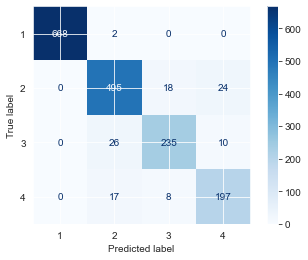

In [ ]:
# build voting classifier
voting_classifier_scaled = VotingClassifier(
    estimators=[
        ('tree_scaled', tree_scaled),
        ('knn_scaled', knn_scaled),
        ('mlp_scaled', mlp_scaled),
        ('rfc_scaled', rfc_scaled)
    ],
    voting='soft'
)
voting_classifier_scaled = voting_classifier_scaled.fit(X_train_scaled, y_train_scaled)


# make prediction
y_pred_voting_classifier_scaled = voting_classifier_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_voting_classifier_scaled))
print(f'Train accuracy:\t {voting_classifier_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {voting_classifier_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Voting Classifier (scaled)'] = voting_classifier_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_voting_classifier_scaled, cmap='Blues')

## 2.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.92      0.96      0.94       537
           3       0.94      0.87      0.91       271
           4       0.92      0.91      0.92       222

    accuracy                           0.96      1700
   macro avg       0.95      0.94      0.94      1700
weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 1.0
Test accuracy:	 0.9564705882352941


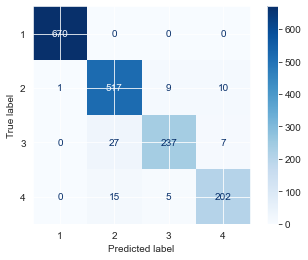

In [ ]:
# build and fit classifier
rfe_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_scaled, y_train_scaled)

# make prediction
y_pred_rfe_scaled = rfe_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_rfe_scaled))
print(f'Train accuracy:\t {rfe_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {rfe_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['RFE (scaled)'] = rfe_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_rfe_scaled, cmap='Blues')

## 2.5 PCA

In [ ]:
scores_pca_scaled = {}

In [ ]:
pca_scaled = PCA(n_components=12)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

X_pca_scaled.shape, y.shape

((5664, 12), (5664,))

In [ ]:
pca_scaled.explained_variance_ratio_

array([0.37473455, 0.1467854 , 0.09238494, 0.07108462, 0.06132245,
       0.04459581, 0.03300204, 0.03048735, 0.0258334 , 0.02049674,
       0.01632387, 0.01568342])

In [ ]:
pca_scaled.explained_variance_ratio_.sum()

0.9327345792164129

In [ ]:
# split X and y into training and testing sets
X_train_pca_scaled, X_test_pca_scaled, y_train_pca_scaled, y_test_pca_scaled = train_test_split(X_pca_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca_scaled.shape, X_test_pca_scaled.shape, y_train_pca_scaled.shape, y_test_pca_scaled.shape)

(3964, 12) (1700, 12) (3964,) (1700,)


### 2.5.1 Decision tree

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.59      0.88      0.70       537
           3       0.77      0.28      0.41       271
           4       0.38      0.24      0.29       222

    accuracy                           0.74      1700
   macro avg       0.68      0.60      0.60      1700
weighted avg       0.75      0.74      0.72      1700

Train accuracy:	 0.7714429868819375
Test accuracy:	 0.7429411764705882


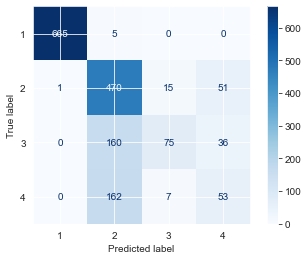

In [ ]:
# build decision tree classifier
tree_pca_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_tree_pca_scaled = tree_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_tree_pca_scaled))
print(f'Train accuracy:\t {tree_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {tree_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Decision Tree PCA (scaled)'] =  tree_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_tree_pca_scaled, cmap='Blues')

### 2.5.2 KNeighbors

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.85      0.96      0.90       537
           3       0.92      0.78      0.85       271
           4       0.89      0.80      0.84       222

    accuracy                           0.92      1700
   macro avg       0.92      0.88      0.90      1700
weighted avg       0.93      0.92      0.92      1700

Train accuracy:	 0.9661957618567104
Test accuracy:	 0.9235294117647059


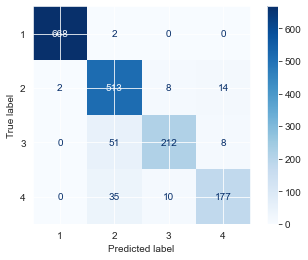

In [ ]:
# build KNeighbors classifier
knn_pca_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_knn_pca_scaled = knn_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_knn_pca_scaled))
print(f'Train accuracy:\t {knn_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {knn_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['KNN PCA (scaled)'] =  knn_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_knn_pca_scaled, cmap='Blues')

### 2.5.3 MLP

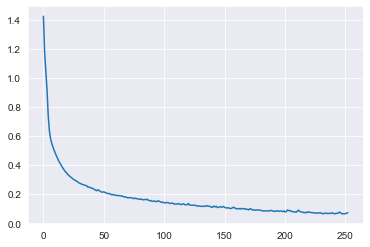

In [ ]:
# build MLP classifier
mlp_pca_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)
plt.plot(mlp_pca_scaled.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.89      0.90      0.90       537
           3       0.82      0.86      0.84       271
           4       0.87      0.81      0.84       222

    accuracy                           0.92      1700
   macro avg       0.90      0.89      0.89      1700
weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.9757820383451059
Test accuracy:	 0.9194117647058824


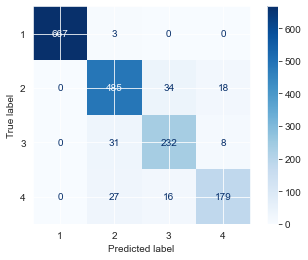

In [ ]:
# make prediction
y_pred_mlp_pca_scaled = mlp_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_mlp_pca_scaled))
print(f'Train accuracy:\t {mlp_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {mlp_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['MLP PCA (scaled)'] =  mlp_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_mlp_pca_scaled, cmap='Blues')

### 2.5.4 Random Forest

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.86      0.94      0.90       537
           3       0.89      0.80      0.84       271
           4       0.87      0.79      0.83       222

    accuracy                           0.92      1700
   macro avg       0.90      0.88      0.89      1700
weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.9876387487386479
Test accuracy:	 0.918235294117647


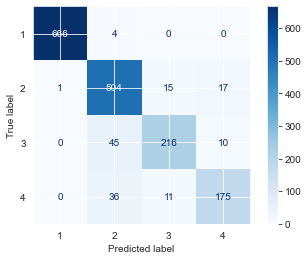

In [ ]:
# build random forest classifier
rfc_pca_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_rfc_pca_scaled = rfc_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_rfc_pca_scaled))
print(f'Train accuracy:\t {rfc_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Random Forest PCA (scaled)'] = rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_rfc_pca_scaled, cmap='Blues')

### 2.5.5 Voting

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.90      0.92      0.91       537
           3       0.88      0.86      0.87       271
           4       0.86      0.86      0.86       222

    accuracy                           0.93      1700
   macro avg       0.91      0.91      0.91      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9906659939455096
Test accuracy:	 0.9317647058823529


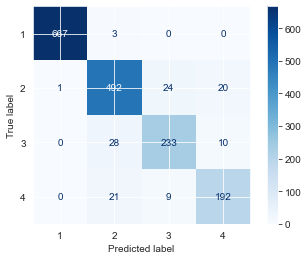

In [ ]:
# build voting classifier
voting_classifier_pca_scaled = VotingClassifier(
    estimators=[
        ('tree_pca_scaled', tree_pca_scaled),
        ('knn_pca_scaled', knn_pca_scaled),
        ('mlp_pca_scaled', mlp_pca_scaled),
        ('rfc_pca_scaled', rfc_pca_scaled)
    ],
    voting='soft'
)
voting_classifier_pca_scaled = voting_classifier_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)


# make prediction
y_pred_voting_classifier_pca_scaled = voting_classifier_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_voting_classifier_pca_scaled))
print(f'Train accuracy:\t {voting_classifier_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {voting_classifier_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Voting Classifier PCA (scaled)'] = voting_classifier_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_voting_classifier_pca_scaled, cmap='Blues')

### 2.5.6 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.88      0.93      0.90       537
           3       0.91      0.82      0.87       271
           4       0.83      0.84      0.84       222

    accuracy                           0.93      1700
   macro avg       0.91      0.90      0.90      1700
weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 1.0
Test accuracy:	 0.9252941176470588


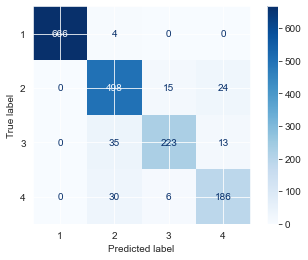

In [ ]:
# build and fit classifier
rfe_pca_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_pca_scaled, y_train_pca_scaled)

# make prediction
y_pred_rfe_pca_scaled = rfe_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_rfe_pca_scaled))
print(f'Train accuracy:\t {rfe_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {rfe_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['RFE PCA (scaled)'] = rfe_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_rfe_pca_scaled, cmap='Blues')

## 2.6 LDA

In [ ]:
scores_lda_scaled = {}

In [ ]:
lda_scaled = LinearDiscriminantAnalysis(n_components=2)
X_lda_scaled = lda_scaled.fit(X_scaled, y).transform(X_scaled)
X_lda_scaled.shape

(5664, 2)

In [ ]:
# split X and y into training and testing sets
X_train_lda_scaled, X_test_lda_scaled, y_train_lda_scaled, y_test_lda_scaled = train_test_split(X_lda_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda_scaled.shape, X_test_lda_scaled.shape, y_train_lda_scaled.shape, y_test_lda_scaled.shape)

(3964, 2) (1700, 2) (3964,) (1700,)


### 2.6.1 Decision tree

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.64      0.80      0.71       537
           3       0.55      0.44      0.49       271
           4       0.50      0.32      0.39       222

    accuracy                           0.76      1700
   macro avg       0.67      0.64      0.65      1700
weighted avg       0.75      0.76      0.75      1700

Train accuracy:	 0.7835519677093845
Test accuracy:	 0.7558823529411764


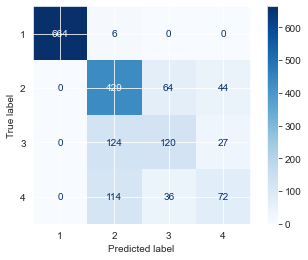

In [ ]:
# build decision tree classifier
tree_lda_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
tree_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_tree_lda_scaled = tree_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_tree_lda_scaled))
print(f'Train accuracy:\t {tree_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {tree_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Decision Tree LDA (scaled)'] =  tree_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_tree_lda_scaled, cmap='Blues')

### 2.6.2 KNeighbors

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.72      0.87      0.79       537
           3       0.70      0.62      0.66       271
           4       0.79      0.54      0.64       222

    accuracy                           0.83      1700
   macro avg       0.80      0.75      0.77      1700
weighted avg       0.84      0.83      0.83      1700

Train accuracy:	 0.9195257315842583
Test accuracy:	 0.8347058823529412


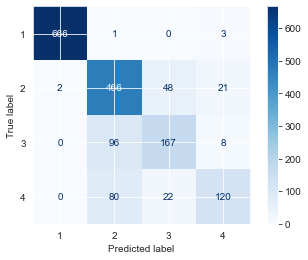

In [ ]:
# build KNeighbors classifier
knn_lda_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
knn_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_knn_lda_scaled = knn_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_knn_lda_scaled))
print(f'Train accuracy:\t {knn_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {knn_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['KNN LDA (scaled)'] =  knn_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_knn_lda_scaled, cmap='Blues')

### 2.6.3 MLP

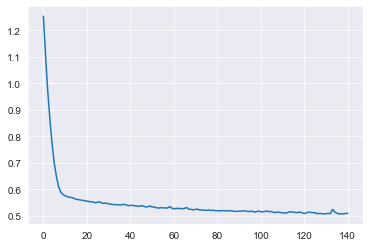

In [ ]:
# build MLP classifier
mlp_lda_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
mlp_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)
plt.plot(mlp_lda_scaled.loss_curve_)

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       670
           2       0.62      0.84      0.72       537
           3       0.50      0.35      0.41       271
           4       0.39      0.22      0.28       222

    accuracy                           0.74      1700
   macro avg       0.63      0.60      0.60      1700
weighted avg       0.72      0.74      0.72      1700

Train accuracy:	 0.7651362260343088
Test accuracy:	 0.74


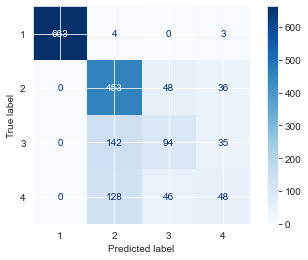

In [ ]:
# make prediction
y_pred_mlp_lda_scaled = mlp_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_mlp_lda_scaled))
print(f'Train accuracy:\t {mlp_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {mlp_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['MLP LDA (scaled)'] =  mlp_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_mlp_lda_scaled, cmap='Blues')

### 2.6.4 Random Forest

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.77      0.83      0.80       537
           3       0.70      0.66      0.68       271
           4       0.71      0.62      0.66       222

    accuracy                           0.84      1700
   macro avg       0.79      0.78      0.78      1700
weighted avg       0.84      0.84      0.84      1700

Train accuracy:	 0.9722502522704339
Test accuracy:	 0.8405882352941176


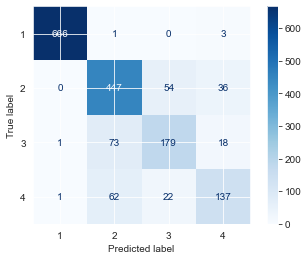

In [ ]:
# build random forest classifier
rfc_lda_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_rfc_lda_scaled = rfc_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_rfc_lda_scaled))
print(f'Train accuracy:\t {rfc_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Random Forest LDA (scaled)'] = rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_rfc_lda_scaled, cmap='Blues')

### 2.6.5 Voting

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       670
           2       0.75      0.84      0.79       537
           3       0.71      0.63      0.67       271
           4       0.72      0.62      0.67       222

    accuracy                           0.84      1700
   macro avg       0.80      0.77      0.78      1700
weighted avg       0.84      0.84      0.84      1700

Train accuracy:	 0.9427346115035318
Test accuracy:	 0.8382352941176471


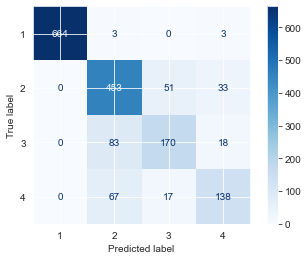

In [ ]:
# build voting classifier
voting_classifier_lda_scaled = VotingClassifier(
    estimators=[
        ('tree_lda_scaled', tree_lda_scaled),
        ('knn_lda_scaled', knn_lda_scaled),
        ('mlp_lda_scaled', mlp_lda_scaled),
        ('rfc_lda_scaled', rfc_lda_scaled)
    ],
    voting='soft'
)
voting_classifier_lda_scaled = voting_classifier_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)


# make prediction
y_pred_voting_classifier_lda_scaled = voting_classifier_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_voting_classifier_lda_scaled))
print(f'Train accuracy:\t {voting_classifier_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {voting_classifier_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Voting Classifier LDA (scaled)'] = voting_classifier_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_voting_classifier_lda_scaled, cmap='Blues')

### 2.6.5 Recursive Feature Elimination

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       670
           2       0.69      0.66      0.67       537
           3       0.54      0.58      0.56       271
           4       0.50      0.53      0.51       222

    accuracy                           0.76      1700
   macro avg       0.68      0.69      0.68      1700
weighted avg       0.76      0.76      0.76      1700

Train accuracy:	 0.9994954591321897
Test accuracy:	 0.758235294117647


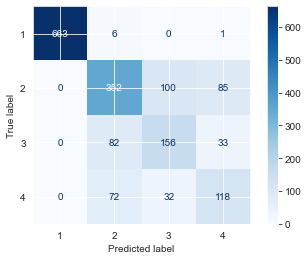

In [ ]:
# build and fit classifier
rfe_lda_scaled = RFE(RandomForestClassifier(), step=1).fit(X_train_lda_scaled, y_train_lda_scaled)

# make prediction
y_pred_rfe_lda_scaled = rfe_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_rfe_lda_scaled))
print(f'Train accuracy:\t {rfe_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {rfe_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['RFE LDA (scaled)'] = rfe_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_rfe_lda_scaled, cmap='Blues')

# Final scores

## Non-normalized

Text(0, 0.5, 'Models')

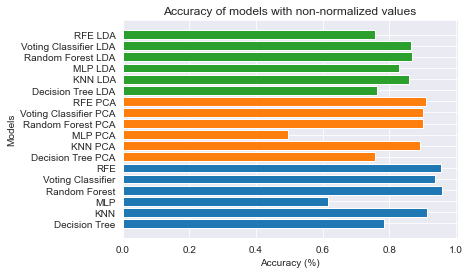

In [ ]:
plt.barh(list(scores.keys()), scores.values())
plt.barh(list(scores_pca.keys()), scores_pca.values())
plt.barh(list(scores_lda.keys()), scores_lda.values())
plt.title('Accuracy of models with non-normalized values')
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')

In [ ]:
print(f'Scores: {scores}\n')
print(f'Scores PCA: {scores_pca}\n')
print(f'Scores LDA: {scores_lda}')

Scores: {'Decision Tree': 0.7841176470588235, 'KNN': 0.9123529411764706, 'MLP': 0.6164705882352941, 'Random Forest': 0.9570588235294117, 'Voting Classifier': 0.9376470588235294, 'RFE': 0.9564705882352941}

Scores PCA: {'Decision Tree PCA': 0.7564705882352941, 'KNN PCA': 0.8929411764705882, 'MLP PCA': 0.4964705882352941, 'Random Forest PCA': 0.9005882352941177, 'Voting Classifier PCA': 0.9011764705882352, 'RFE PCA': 0.91}

Scores LDA: {'Decision Tree LDA': 0.7635294117647059, 'KNN LDA': 0.8582352941176471, 'MLP LDA': 0.8294117647058824, 'Random Forest LDA': 0.8676470588235294, 'Voting Classifier LDA': 0.8664705882352941, 'RFE LDA': 0.7576470588235295}


In [ ]:
# get the highest accuracy
max(max(scores.values()), max(scores_pca.values()), max(scores_lda.values()))

0.9570588235294117

## Normalized

Text(0, 0.5, 'Models')

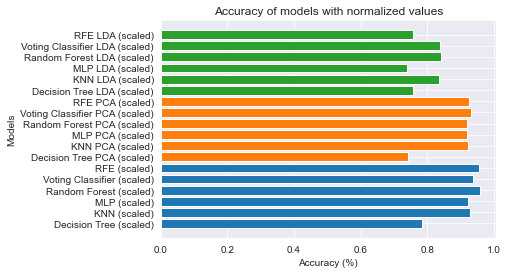

In [ ]:
plt.barh(list(scores_scaled.keys()), scores_scaled.values())
plt.barh(list(scores_pca_scaled.keys()), scores_pca_scaled.values())
plt.barh(list(scores_lda_scaled.keys()), scores_lda_scaled.values())
plt.title('Accuracy of models with normalized values')
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')

In [ ]:
print(f'Scores: {scores_scaled}\n')
print(f'Scores PCA: {scores_pca_scaled}\n')
print(f'Scores LDA: {scores_lda_scaled}')

Scores: {'Decision Tree (scaled)': 0.7841176470588235, 'KNN (scaled)': 0.928235294117647, 'MLP (scaled)': 0.9229411764705883, 'Random Forest (scaled)': 0.9576470588235294, 'Voting Classifier (scaled)': 0.9382352941176471, 'RFE (scaled)': 0.9564705882352941}

Scores PCA: {'Decision Tree PCA (scaled)': 0.7429411764705882, 'KNN PCA (scaled)': 0.9235294117647059, 'MLP PCA (scaled)': 0.9194117647058824, 'Random Forest PCA (scaled)': 0.918235294117647, 'Voting Classifier PCA (scaled)': 0.9317647058823529, 'RFE PCA (scaled)': 0.9252941176470588}

Scores LDA: {'Decision Tree LDA (scaled)': 0.7558823529411764, 'KNN LDA (scaled)': 0.8347058823529412, 'MLP LDA (scaled)': 0.74, 'Random Forest LDA (scaled)': 0.8405882352941176, 'Voting Classifier LDA (scaled)': 0.8382352941176471, 'RFE LDA (scaled)': 0.758235294117647}


In [ ]:
# get the highest accuracy
max(max(scores_scaled.values()), max(scores_pca_scaled.values()), max(scores_lda_scaled.values()))

0.9576470588235294

# Feature importance

Text(0.5, 1.0, 'Importance of each feature')

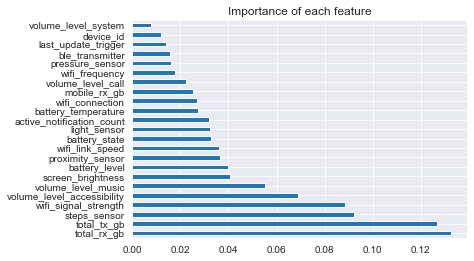

In [ ]:
pd.Series(
    rfc.feature_importances_, index=X.columns
).nlargest(len(X.columns)).plot(kind='barh').set_title('Importance of each feature')

Text(0.5, 1.0, 'Importance of each feature')

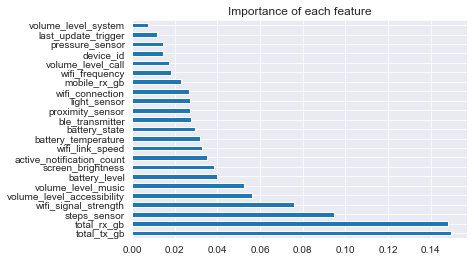

In [ ]:
pd.Series(
    rfc_scaled.feature_importances_, index=X.columns
).nlargest(len(X.columns)).plot(kind='barh').set_title('Importance of each feature')

# SelectKBest

In [ ]:
df_test = pd.concat([
    pd.DataFrame(X_scaled, columns=X.columns), y.reset_index()], axis=1
).drop('time', axis=1)
df_test

,last_update_trigger,light_sensor,active_notification_count,pressure_sensor,battery_temperature,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,total_tx_gb,...,volume_level_call,volume_level_music,volume_level_accessibility,wifi_connection,mobile_rx_gb,volume_level_system,battery_state,ble_transmitter,device_id,last_used_app
0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.001468,0.74,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
1,0.00,0.000000,0.000000,0.0,0.537530,0.0,0.001468,0.73,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
2,0.00,0.000000,0.000000,0.0,0.527845,0.0,0.001468,0.72,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
3,0.00,0.000000,0.000000,0.0,0.530266,0.0,0.001468,0.71,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
4,0.00,0.000000,0.000000,0.0,0.523002,0.0,0.001468,0.70,1.000000,0.000000,...,0.0000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,0.10,0.001364,0.400000,0.0,0.441889,0.0,0.502055,0.76,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5660,0.45,0.000863,0.444444,0.0,0.426150,0.0,0.502055,0.76,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5661,0.50,0.000043,0.522222,0.0,0.415254,0.0,0.516735,0.75,0.348315,0.018830,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3
5662,0.45,0.000043,0.711111,0.0,0.415254,0.0,0.516735,0.75,0.348315,0.018969,...,0.9375,0.125,0.266667,0.0,0.0,0.214286,0.0,0.5,1.0,3


## Best features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

def best_features(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    # apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # concat two dataframes for better visualization
    feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
    # naming the dataframe columns
    feature_scores.columns = ['Feature', 'Score']
    # print 10 best features
    return feature_scores.nlargest(10, 'Score')

best_features(df_test, 'last_used_app')

,Feature,Score
14,volume_level_call,1262.550058
10,wifi_frequency,1185.699946
12,proximity_sensor,1041.605441
21,ble_transmitter,945.368318
16,volume_level_accessibility,944.282341
11,total_rx_gb,848.841101
3,pressure_sensor,791.953256
13,steps_sensor,785.705721
9,total_tx_gb,779.377434
15,volume_level_music,621.247050


## Worst features

In [ ]:
def worst_features(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    # apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # concat two dataframes for better visualization
    feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
    # naming the dataframe columns
    feature_scores.columns = ['Feature', 'Score']
    # print 10 best features
    return feature_scores.nsmallest(10, 'Score')

worst_features(df_test, 'last_used_app')

,Feature,Score
1,light_sensor,14.215015
22,device_id,14.693283
4,battery_temperature,113.741227
7,battery_level,113.828359
19,volume_level_system,277.332229
0,last_update_trigger,287.513745
5,screen_brightness,336.342224
8,wifi_signal_strength,379.430444
2,active_notification_count,421.114055
20,battery_state,423.202837


## Largest features

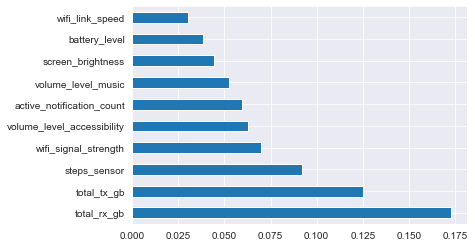

Index(['total_rx_gb', 'total_tx_gb', 'steps_sensor', 'wifi_signal_strength',
       'volume_level_accessibility', 'active_notification_count',
       'volume_level_music', 'screen_brightness', 'battery_level',
       'wifi_link_speed'],
      dtype='object')


In [ ]:
def largest(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    model = RandomForestClassifier()
    model.fit(X, y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.show()
    print(feat_importances.nlargest(10).index)

largest(df_test, 'last_used_app')

## Smallest features

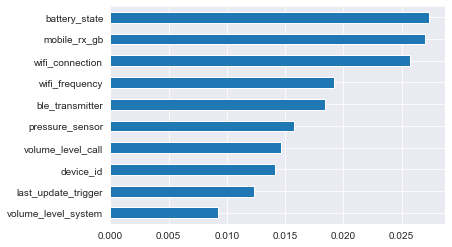

['volume_level_system',
 'last_update_trigger',
 'device_id',
 'volume_level_call',
 'pressure_sensor',
 'ble_transmitter',
 'wifi_frequency',
 'wifi_connection',
 'mobile_rx_gb',
 'battery_state']

In [ ]:
def smallest(df, target):
    features = list(df.columns)
    features.remove(target)

    X = df[features]
    y = df[target]

    from sklearn.ensemble import ExtraTreesClassifier
    model = RandomForestClassifier()
    model.fit(X, y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nsmallest(10).plot(kind='barh')
    plt.show()
    return feat_importances.nsmallest(10).index.to_list()

smallest(df_test, 'last_used_app')

# RFE

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.91      0.96      0.94       537
           3       0.96      0.86      0.91       271
           4       0.90      0.90      0.90       222

    accuracy                           0.95      1700
   macro avg       0.94      0.93      0.94      1700
weighted avg       0.95      0.95      0.95      1700

Train accuracy:	 0.9997477295660948
Test accuracy:	 0.951764705882353


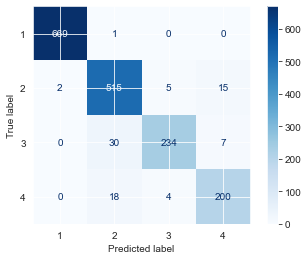

In [ ]:
from sklearn.feature_selection import RFE

model = RFE(RandomForestClassifier(), step=1).fit(X_train, y_train)

# make prediction
y_pred_model = model.predict(X_test)
print(classification_report(y_test, y_pred_model))
print(f'Train accuracy:\t {model.score(X_train, y_train)}')
print(f'Test accuracy:\t {model.score(X_test, y_test)}')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_model, cmap='Blues')

In [ ]:
model.get_feature_names_out()

array(['light_sensor', 'active_notification_count', 'screen_brightness',
       'wifi_link_speed', 'battery_level', 'wifi_signal_strength',
       'total_tx_gb', 'total_rx_gb', 'steps_sensor',
       'volume_level_accessibility', 'battery_state'], dtype=object)

In [ ]:
print(f'{"Feature":^28}|{"Selected":^12}|{"Rank":^6}')
for i in range(X_train_scaled.shape[1]):
    # print table of all summarized features
    print('\033[4m' + f'{df_test.columns[i]:<28}|{"Yes" if model.support_[i] else "No":^12}|{model.ranking_[i]:^6}' + '\033[0m')

          Feature           |  Selected  | Rank 
last_update_trigger         |     No     |  12  
light_sensor                |    Yes     |  1   
active_notification_count   |    Yes     |  1   
pressure_sensor             |     No     |  9   
battery_temperature         |     No     |  2   
screen_brightness           |    Yes     |  1   
wifi_link_speed             |    Yes     |  1   
battery_level               |    Yes     |  1   
wifi_signal_strength        |    Yes     |  1   
total_tx_gb                 |    Yes     |  1   
wifi_frequency              |     No     |  7   
total_rx_gb                 |    Yes     |  1   
proximity_sensor            |     No     |  5   
steps_sensor                |    Yes     |  1   
volume_level_call           |     No     |  8   
volume_level_music          |     No     |  3   
volume_level_accessibility  |    Yes     |  1   
wifi_connection             |     No     |  4   
mobile_rx_gb                |     No     |  6   
volume_level_system 

## Manual test with Random Forest

In [103]:
X_new = X[model.get_feature_names_out()]
X_new

,light_sensor,active_notification_count,screen_brightness,wifi_link_speed,battery_level,wifi_signal_strength,total_tx_gb,total_rx_gb,steps_sensor,volume_level_accessibility,battery_state
time,,,,,,,,,,,
2023-01-17 00:15:00,0.000000,0.00,0.0,0.0,74.0,0.0,0.000,0.000,0.0,0.0,1
2023-01-17 00:30:00,0.000000,0.00,0.0,0.0,73.0,0.0,0.000,0.000,0.0,0.0,1
2023-01-17 00:45:00,0.000000,0.00,0.0,0.0,72.0,0.0,0.000,0.000,0.0,0.0,1
2023-01-17 01:00:00,0.000000,0.00,0.0,0.0,71.0,0.0,0.000,0.000,0.0,0.0,1
2023-01-17 01:15:00,0.000000,0.00,0.0,0.0,70.0,0.0,0.000,0.000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,21.333333,9.00,0.0,341.0,76.0,-58.0,0.135,3.625,586.0,4.0,1
2023-01-26 19:15:00,13.500000,10.00,0.0,341.0,76.0,-58.0,0.135,3.625,586.0,4.0,1
2023-01-26 19:30:00,0.666667,11.75,0.0,351.0,75.0,-58.0,0.135,3.626,586.0,4.0,1


## Split dataset into train and test sets

In [104]:
# split X and y into training and testing sets
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.30, random_state=42, stratify=y)

print(X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape)

(3964, 11) (1700, 11) (3964,) (1700,)


## Random Forest (important features)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       670
           2       0.93      0.95      0.94       537
           3       0.94      0.86      0.90       271
           4       0.90      0.92      0.91       222

    accuracy                           0.95      1700
   macro avg       0.94      0.93      0.94      1700
weighted avg       0.95      0.95      0.95      1700

Train accuracy:	 0.9994954591321897
Test accuracy:	 0.9529411764705882


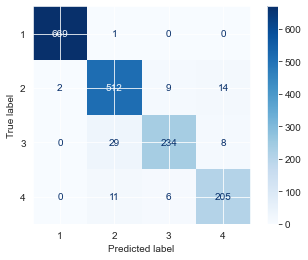

In [106]:
# build random forest classifier
model_rfc = RandomForestClassifier()
# train random forest
model_rfc.fit(X_new_train, y_new_train)

# make prediction
y_pred_model_rfc = model_rfc.predict(X_new_test)
print(classification_report(y_new_test, y_pred_model_rfc))
print(f'Train accuracy:\t {model_rfc.score(X_new_train, y_new_train)}')
print(f'Test accuracy:\t {model_rfc.score(X_new_test, y_new_test)}')

ConfusionMatrixDisplay.from_predictions(y_new_test, y_pred_model_rfc, cmap='Blues')

# SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(
    estimator=LogisticRegression(),
    threshold=0.015,
    prefit=False,
    norm_order=1,
    max_features=5
).fit(X, y)

selector.transform(X)

C:\Users\lemos\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.  , 74.  ],
       [22.2 , 73.  ],
       [21.8 , 72.  ],
       ...,
       [17.15, 75.  ],
       [17.15, 75.  ],
       [17.15, 75.  ]])

# Coeficients

No. of features: 24
['active_notification_count', 'battery_level', 'battery_state', 'battery_temperature', 'ble_transmitter', 'device_id', 'last_update_trigger', 'last_used_app', 'light_sensor', 'mobile_rx_gb', 'pressure_sensor', 'proximity_sensor', 'screen_brightness', 'steps_sensor', 'total_rx_gb', 'total_tx_gb', 'volume_level_accessibility', 'volume_level_call', 'volume_level_music', 'volume_level_system', 'wifi_connection', 'wifi_frequency', 'wifi_link_speed', 'wifi_signal_strength']


C:\Users\lemos\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: index 45 is out of bounds for axis 0 with size 24

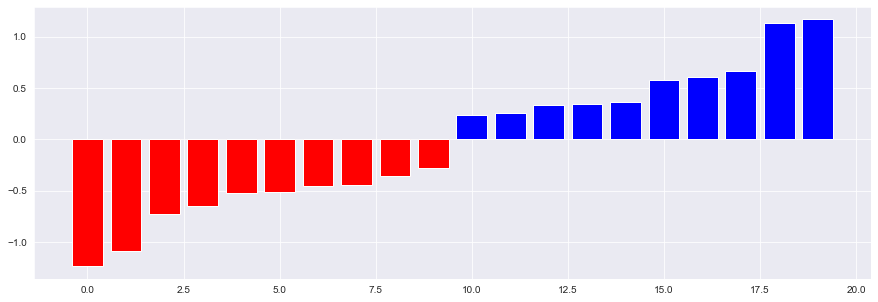

In [111]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import numpy as np

def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right'
    )
    plt.show()

cv = CountVectorizer()
cv.fit(df_test)
print (f'No. of features: {len(cv.vocabulary_)}')
print (cv.get_feature_names())

svm = LinearSVC()
svm.fit(X_train, y_train)
plot_coefficients(svm, cv.get_feature_names())